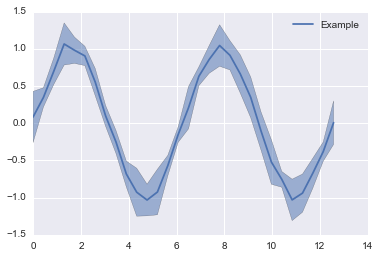

In [4]:
%matplotlib inline
from taskcode import plotting

# An example series with errorbars
plotting.main()

In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('data/TaskCodeTimestamps.pkl','r') as infile:
    timestamps = pickle.load(infile)
    
timestamps.head()

,start_time,end_time,first_name,last_name,task,room
1,2016-05-24 17:51:45.929230+00:00,2016-05-24 18:19:35.422266+00:00,Plumber,2,10,49
2,2016-05-24 16:57:34.369723+00:00,2016-05-24 17:51:46.110982+00:00,Plumber,2,7,49
4,2016-03-01 21:09:05.088310+00:00,2016-03-02 16:24:01.019356+00:00,Plumber,2,9,24
6,2016-03-01 21:14:32.622069+00:00,2016-03-01 21:14:32.637671+00:00,Plumber,2,9,25
7,2016-03-01 21:14:32.656067+00:00,2016-03-01 21:14:32.671939+00:00,Plumber,2,9,0


In [6]:
print timestamps.count()

timestamps['duration'] = (timestamps.end_time - timestamps.start_time) / pd.Timedelta('1h')

print timestamps[timestamps.duration > 8]

start_time    858
end_time      858
first_name    858
last_name     858
task          858
room          858
dtype: int64
                           start_time                         end_time  \
4    2016-03-01 21:09:05.088310+00:00 2016-03-02 16:24:01.019356+00:00   
56   2016-02-22 18:28:39.619262+00:00 2016-02-23 16:05:33.412534+00:00   
60   2016-02-18 22:11:26.662929+00:00 2016-02-19 15:44:24.913496+00:00   
64   2016-02-08 22:40:13.411433+00:00 2016-02-09 15:45:54.759319+00:00   
70   2016-02-05 21:13:48.407078+00:00 2016-02-08 20:14:54.532935+00:00   
180  2016-01-28 22:57:40.412017+00:00 2016-01-29 13:33:47.870669+00:00   
486  2016-02-04 21:36:07.000133+00:00 2016-02-05 15:26:45.890943+00:00   
989  2016-01-22 17:55:55.144518+00:00 2016-02-04 16:08:58.554257+00:00   
1031 2016-03-07 22:05:45.943112+00:00 2016-03-08 15:25:54.670141+00:00   

       first_name last_name  task  room    duration  
4         Plumber         2     9    24   19.248870  
56        Plumber         2   

## Quick Summary

There aren't any missing data fields, but it looks like there are a few outliers in task duration. Will ignore them in the short term, but it could be interesting to see what they look like with the location data.

task
1      79
2     148
3     108
4     134
5      17
6      48
7       4
8      53
9      55
10    109
11     81
12      1
13      7
14      5
dtype: int64


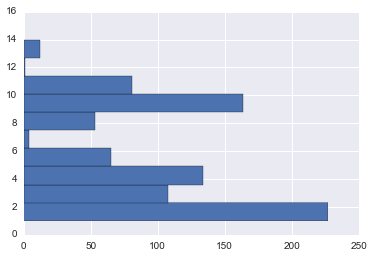

In [7]:
timestamps = timestamps[timestamps.duration <= 8]

sizes = timestamps.groupby(timestamps.task).size()
print sizes
timestamps.task.hist(orientation='horizontal')

In [8]:
common = sizes[sizes > 10].index
print common

# Keep just the common tasks for now
timestamps = timestamps[timestamps.task.isin(common)]

Int64Index([1, 2, 3, 4, 5, 6, 8, 9, 10, 11], dtype='int64', name=u'task')


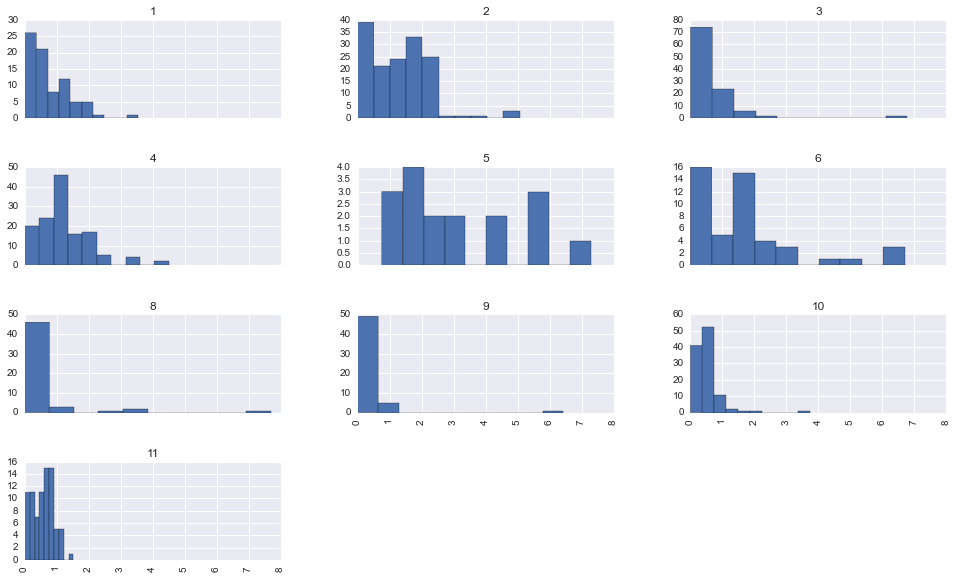

In [9]:
timestamps.duration.hist(by=timestamps.task, figsize=(16,10),sharex=True);

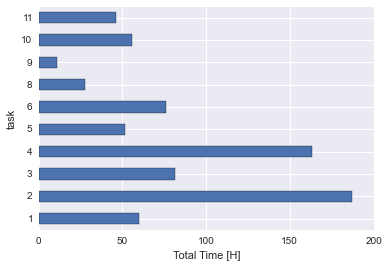

In [10]:
# How much total time per task?

timestamps.groupby(timestamps.task).sum().duration.plot(kind='barh')
plt.xlabel('Total Time [H]')

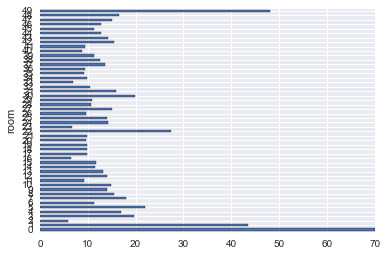

In [11]:
# How much time per room?
timestamps.groupby(timestamps.room).sum().duration.plot(kind='barh')

In [12]:
import seaborn as sns

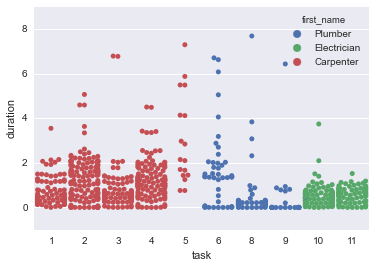

In [13]:
# Do certain skilled workers do better at some tasks than others?
# Not exactly useful because of little overlap
sns.swarmplot(data=timestamps,x="task",y="duration",hue='first_name')

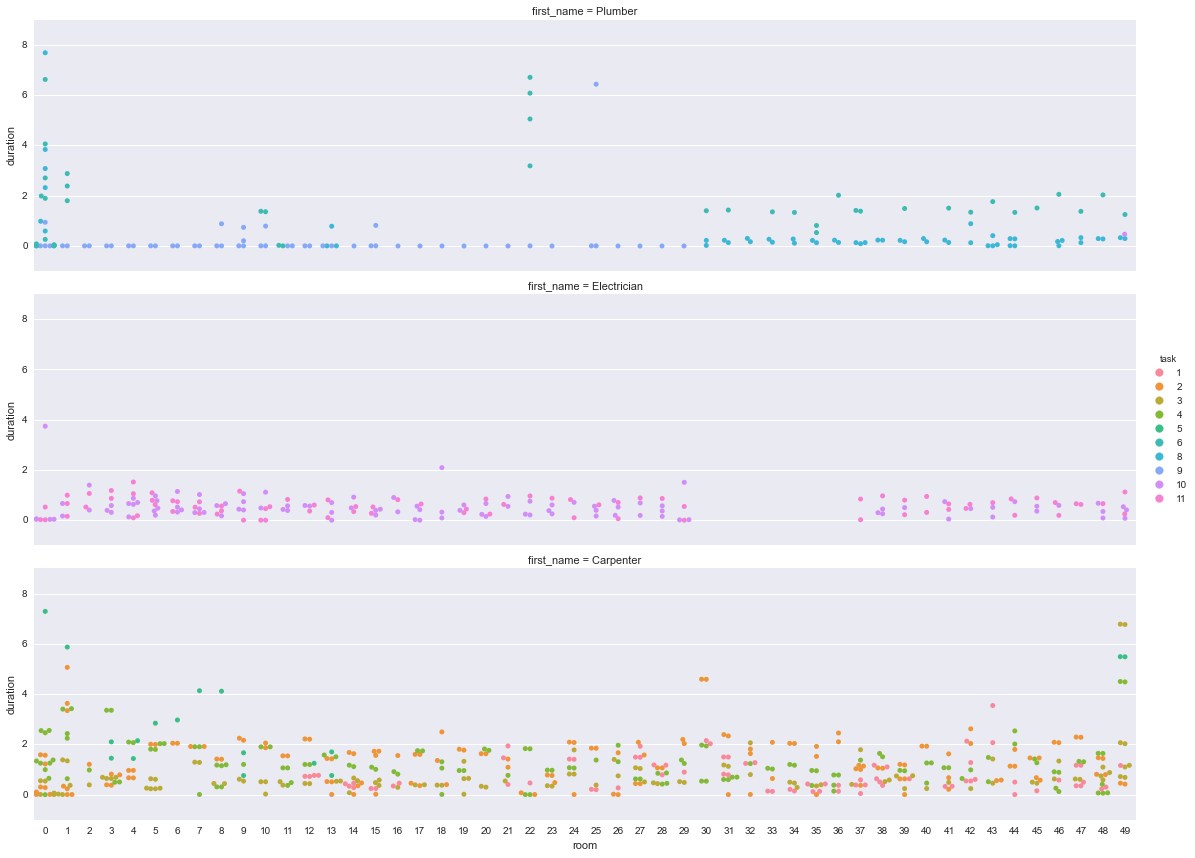

In [14]:
sns.factorplot(data=timestamps,x="room",y="duration",row='first_name',hue='task',kind="swarm",aspect=4)

In [15]:
# Michael says every room should have every job. Does it?
import numpy as np
TR = pd.DataFrame(map(lambda x: str(x[0])+'_'+str(x[1]),timestamps[["task","room"]].values))
VC = TR[0].value_counts()
TR = pd.DataFrame(np.hstack((map(lambda x: map(int,x.split('_')),VC.index),np.atleast_2d(VC.values).T)),columns=[['Task',"Room","Count"]])
TR=TR.pivot(index='Task',columns='Room',values='Count').fillna(0)

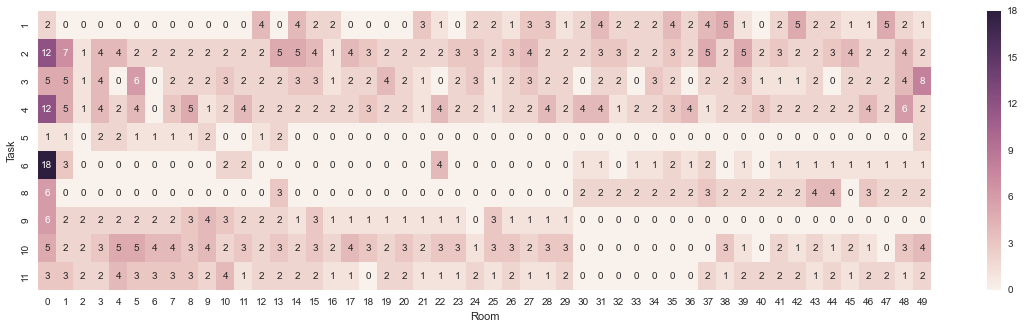

In [21]:
plt.figure(figsize=(20,5))
sns.heatmap(TR,annot=True)

In [42]:
timestamps.loc[timestamps.room==15].sort_values(by=['start_time','end_time'])

,start_time,end_time,first_name,last_name,task,room,duration
1199,2016-02-05 15:22:44.097839+00:00,2016-02-05 15:23:44.144053+00:00,Carpenter,3,2,15,0.016680
1197,2016-02-05 15:23:44.095749+00:00,2016-02-05 15:38:32.153562+00:00,Carpenter,3,1,15,0.246683
935,2016-02-05 15:23:48.745939+00:00,2016-02-05 15:38:23.125215+00:00,Carpenter,5,1,15,0.242883
934,2016-02-05 15:38:23.053913+00:00,2016-02-05 17:21:53.543548+00:00,Carpenter,5,2,15,1.725136
1198,2016-02-05 15:38:32.123514+00:00,2016-02-05 17:22:17.689564+00:00,Carpenter,3,2,15,1.729324
932,2016-02-05 17:21:53.488349+00:00,2016-02-05 17:56:48.813046+00:00,Carpenter,5,3,15,0.582035
1196,2016-02-05 17:22:17.527503+00:00,2016-02-05 17:51:03.699034+00:00,Carpenter,3,3,15,0.479492
1195,2016-02-05 17:51:03.473671+00:00,2016-02-05 18:56:42.411520+00:00,Carpenter,3,4,15,1.094149
930,2016-02-05 17:56:48.768287+00:00,2016-02-05 18:57:14.877755+00:00,Carpenter,5,4,15,1.007253
933,2016-02-05 18:57:14.811794+00:00,2016-02-05 20:31:00.371396+00:00,Carpenter,5,2,15,1.562655


# Exploring gps
It looks like the locational distribution for the different tasks is all over the map

In [17]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_pickle('data/gps_ids.pkl')
df = df.sort(columns = 'task_label', ascending = True)
sns.lmplot('position_x', 'position_y', data = df, hue = 'task_label', fit_reg = False)

IOError: [Errno 2] No such file or directory: 'data/gps_ids.pkl'

In [ ]:
sns.boxplot(x = 'task_label', y = 'position_x', data = df)

In [ ]:
sns.boxplot(x = 'task_label', y = 'position_y', data = df)

In [ ]:
#Means
df2 = df[['position_x', 'position_y', 'position_z']].groupby(df.task_label).mean()

In [ ]:
#Standard Errors
df[['position_x', 'position_y', 'position_z']].groupby(df.task_label).std()